# Atividade Enzimática

In [302]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from lmfit import Model

In [303]:
# importanto o dataframe

# Código para ler o arquivo em xls e retorná-lo em dataframe
df_AMP = pd.read_excel("1. Dados-curva-padrao-AMP (1).xlsx")

df_Km_Ala = pd.read_excel("2. Dados-curva-Km-Ala (1).xlsx")

df_ATP = pd.read_excel("3. Dados-cinética-ATP (1).xlsx")

In [304]:
df_AMP.head()

,Concentração AMP (µM),Replica 1,Replica 2,Replica 3,Replica 4
0,25.0000,146730,148928,153937,150594
1,12.5000,82684,81266,81582,81663
2,6.2500,48887,47797,48629,48095
3,3.1250,32449,30850,31196,31301
4,1.5625,23533,23183,23779,22948


In [305]:
df_Km_Ala.head()

,[L-Ala] (mM),v1,v2,v3,v4
0,500.00,7106,6801,7479,6697
1,250.00,5597,4881,5615,5016
2,125.00,3556,3653,3898,3339
3,62.50,2200,2110,2270,2223
4,31.25,1240,1238,1263,1189


In [306]:
df_ATP.head()

,[ATP] (mM),v1,v2,v3,v4,Blank
0,2.000,6018.0,4761.0,5452.0,4835.0,524.0
1,1.000,5568.0,4500.0,5166.0,5086.0,212.0
2,0.500,3600.0,3304.0,3588.0,3395.0,60.0
3,0.250,1004.0,911.0,1069.0,1026.0,24.0
4,0.125,321.0,326.0,339.0,305.0,5.0


## Atividade 1

In [307]:
df_AMP["Média ABS"] = (df_AMP["Replica 1"] + df_AMP["Replica 2"] + df_AMP["Replica 3"] + df_AMP["Replica 4"])/4

branco = df_AMP.loc[7]["Média ABS"]

df_AMP["Média ABS sem branco"] = df_AMP["Média ABS"] - branco

In [308]:
df_AMP.head()

,Concentração AMP (µM),Replica 1,Replica 2,Replica 3,Replica 4,Média ABS,Média ABS sem branco
0,25.0000,146730,148928,153937,150594,150047.25,135654.25
1,12.5000,82684,81266,81582,81663,81798.75,67405.75
2,6.2500,48887,47797,48629,48095,48352.00,33959.00
3,3.1250,32449,30850,31196,31301,31449.00,17056.00
4,1.5625,23533,23183,23779,22948,23360.75,8967.75


In [309]:
#df_styled = df_AMP.style.background_gradient()
#dfi.export(df_styled, "df_AMP.png")

In [310]:
x = np.array(list(df_AMP["Concentração AMP (µM)"])).reshape((-1, 1))
y = np.array(list(df_AMP["Média ABS sem branco"]))

model = LinearRegression()

model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

a = model.coef_[0]

b = model.intercept_

coefficient of determination: 0.9999750500710823
intercept: 135.45391705071233
slope: [5413.65152582]


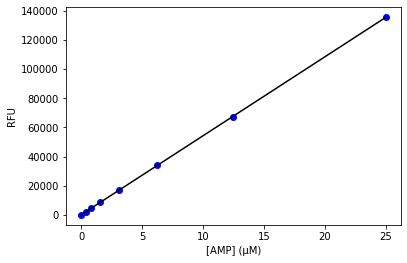

In [311]:
def ABS(AMP):
    return b + a*AMP

AMP = np.linspace(0, 25, 100)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.plot(AMP, ABS(AMP), color='black')
df_AMP.plot('Concentração AMP (µM)','Média ABS sem branco',legend=True, ax=ax1, kind = 'scatter', linewidth = 2.5, color = 'blue')
#plt.title('Curva de calibração do AMP')
plt.xlabel('[AMP] (µM)')
plt.ylabel('RFU')
plt.savefig('reg_AMP.png', dpi=100, format='png', facecolor='white')
plt.show()

In [312]:
a

5413.651525817334

## Atividade 2

In [313]:
df_Km_Ala

,[L-Ala] (mM),v1,v2,v3,v4
0,500.0000,7106,6801,7479,6697
1,250.0000,5597,4881,5615,5016
2,125.0000,3556,3653,3898,3339
3,62.5000,2200,2110,2270,2223
4,31.2500,1240,1238,1263,1189
5,15.6250,550,627,666,578
6,7.8125,446,346,361,377
7,0.0000,137,108,144,99


In [314]:
#df_styled = df_Km_Ala.style.background_gradient()
#dfi.export(df_styled, "df_Km_Ala_sem_mudancas.png")

In [315]:
df_Km_Ala["Média v"] = (df_Km_Ala["v1"] + df_Km_Ala["v2"] + df_Km_Ala["v3"] + df_Km_Ala["v4"])/4
df_Km_Ala["Média v"] = df_Km_Ala["Média v"] - df_Km_Ala.loc[7]["Média v"]
df_Km_Ala = df_Km_Ala.drop(7)
df_Km_Ala["inverso Média v"] = 1/df_Km_Ala["Média v"]
df_Km_Ala["inverso [L-Ala] (mM)"] = 1/df_Km_Ala["[L-Ala] (mM)"]

In [316]:
df_Km_Ala

,[L-Ala] (mM),v1,v2,v3,v4,Média v,inverso Média v,inverso [L-Ala] (mM)
0,500.0000,7106,6801,7479,6697,6898.75,0.000145,0.002
1,250.0000,5597,4881,5615,5016,5155.25,0.000194,0.004
2,125.0000,3556,3653,3898,3339,3489.50,0.000287,0.008
3,62.5000,2200,2110,2270,2223,2078.75,0.000481,0.016
4,31.2500,1240,1238,1263,1189,1110.50,0.000900,0.032
5,15.6250,550,627,666,578,483.25,0.002069,0.064
6,7.8125,446,346,361,377,260.50,0.003839,0.128


In [317]:
df_styled = df_Km_Ala.style.background_gradient()
dfi.export(df_styled, "df_Km_Ala_com_mudancas.png")

In [318]:
x = np.array(list(df_Km_Ala["inverso [L-Ala] (mM)"])).reshape((-1, 1))
y = np.array(list(df_Km_Ala["inverso Média v"]))

model = LinearRegression()

model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

a = model.coef_[0]

b = model.intercept_

V_max = 1/b

K = V_max*a

coefficient of determination: 0.9975279751813496
intercept: 4.8944016971864e-05
slope: [0.02981317]


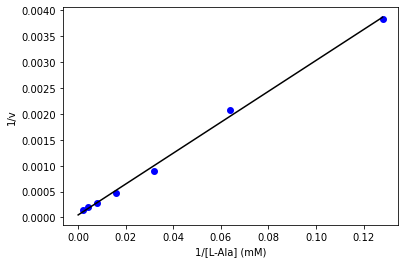

In [319]:
def inv_v(inv_Ala):
    return b + a*inv_Ala

inv_Ala = np.linspace(0, 0.128, 100)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.plot(inv_Ala, inv_v(inv_Ala), color='black')
df_Km_Ala.plot('inverso [L-Ala] (mM)','inverso Média v',legend=True, ax=ax1, kind = 'scatter', linewidth = 2.5, color = 'blue')
plt.xlabel('1/[L-Ala] (mM)')
plt.ylabel('1/v')
plt.savefig('reg_aanc.png', dpi=100, format='png', facecolor='white')
plt.show()

In [320]:
print(V_max, K)

20431.506481678054 609.1278964111681


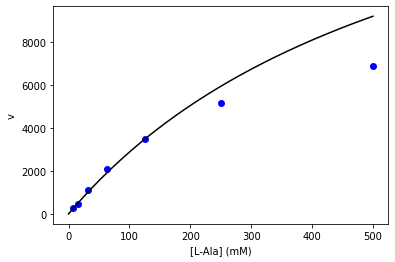

In [321]:
def v(Ala):
    return V_max*Ala/(K + Ala)

Ala = np.linspace(0, 500, 500)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.plot(Ala, v(Ala), color='black')
df_Km_Ala.plot('[L-Ala] (mM)','Média v',legend=True, ax=ax1, kind = 'scatter', linewidth = 2.5, color = 'blue')
plt.xlabel('[L-Ala] (mM)')
plt.ylabel('v')
plt.savefig('mod_aanc_dados.png', dpi=100, format='png', facecolor='white')
plt.show()

In [322]:
def v_2(Ala, V_max_2, K_m_2):
    return V_max_2*(Ala)/(K_m_2 + Ala)

In [323]:
modelo_Ala = Model(v_2)

print(f'Variável independente: {modelo_ATP.independent_vars}')
print(f'Parâmetros do modelo: {modelo_ATP.param_names}')

Variável independente: ['ATP']
Parâmetros do modelo: ['V_max_2', 'K_prime', 'h']


In [324]:
params = modelo_Ala.make_params(V_max_2=7000, K_m_2 = 125)

In [325]:
resultado_fit = modelo_Ala.fit(df_Km_Ala["Média v"], params, Ala=df_Km_Ala["[L-Ala] (mM)"])
print(resultado_fit.fit_report())

[[Model]]
    Model(v_2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 7
    # variables        = 2
    chi-square         = 21565.9931
    reduced chi-square = 4313.19862
    Akaike info crit   = 60.2307397
    Bayesian info crit = 60.1225600
[[Variables]]
    V_max_2:  10412.6628 +/- 226.376188 (2.17%) (init = 7000)
    K_m_2:    253.878820 +/- 11.3876366 (4.49%) (init = 125)
[[Correlations]] (unreported correlations are < 0.100)
    C(V_max_2, K_m_2) =  0.949


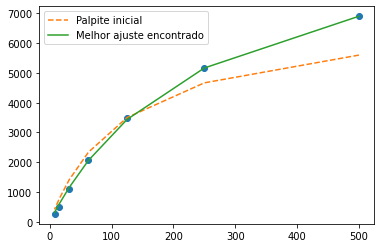

In [326]:
plt.plot(df_Km_Ala["[L-Ala] (mM)"], df_Km_Ala["Média v"], 'o')
plt.plot(df_Km_Ala["[L-Ala] (mM)"], resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(df_Km_Ala["[L-Ala] (mM)"], resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.legend()
#plt.ylim(0, 1000)
#plt.yscale('log')
plt.show()

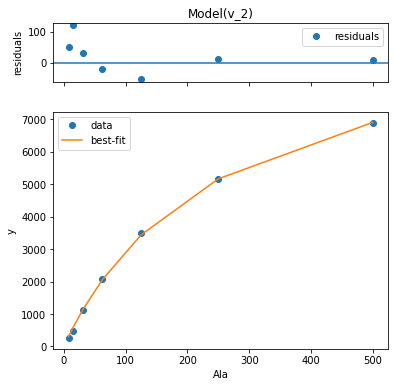

In [327]:
resultado_fit.plot()
#plt.savefig('aanc_lmfit.png', dpi=100, format='png', facecolor='white')
plt.show()

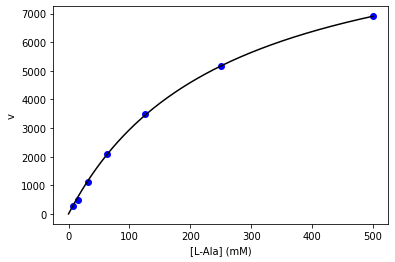

In [328]:
V_max = 10412.66
K = 253.87

def v(Ala):
    return V_max*Ala/(K + Ala)

Ala = np.linspace(0, 500, 500)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.plot(Ala, v(Ala), color='black')
df_Km_Ala.plot('[L-Ala] (mM)','Média v',legend=True, ax=ax1, kind = 'scatter', linewidth = 2.5, color = 'blue')
plt.xlabel('[L-Ala] (mM)')
plt.ylabel('v')
plt.savefig('aanc_lmfit.png', dpi=100, format='png', facecolor='white')
plt.show()

## Atividade 3

In [329]:
df_ATP["Média v"] = (df_ATP["v1"] + df_ATP["v2"] + df_ATP["v3"] + df_ATP["v4"])/4
df_ATP["Média v"] = df_ATP["Média v"] - df_ATP["Blank"]

In [330]:
df_styled = df_ATP.style.background_gradient()
dfi.export(df_styled, "df_ATP.png")

In [294]:
def v_2(ATP, V_max_2, K_prime, h):
    return V_max_2*(ATP**h)/(K_prime + ATP**h)

In [295]:
modelo_ATP = Model(v_2)

print(f'Variável independente: {modelo_ATP.independent_vars}')
print(f'Parâmetros do modelo: {modelo_ATP.param_names}')

Variável independente: ['ATP']
Parâmetros do modelo: ['V_max_2', 'K_prime', 'h']


In [296]:
params = modelo_ATP.make_params(V_max_2=5000, K_prime = 1, h = 1.1)

In [297]:
resultado_fit = modelo_ATP.fit(df_ATP["Média v"], params, ATP=df_ATP["[ATP] (mM)"])
print(resultado_fit.fit_report())

[[Model]]
    Model(v_2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 8
    # variables        = 3
    chi-square         = 100519.894
    reduced chi-square = 20103.9788
    Akaike info crit   = 81.5093551
    Bayesian info crit = 81.7476798
[[Variables]]
    V_max_2:  4911.27214 +/- 124.140134 (2.53%) (init = 5000)
    K_prime:  0.04665705 +/- 0.01708128 (36.61%) (init = 1)
    h:        3.18772021 +/- 0.32312538 (10.14%) (init = 1.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(K_prime, h)       = -0.938
    C(V_max_2, K_prime) =  0.628
    C(V_max_2, h)       = -0.497


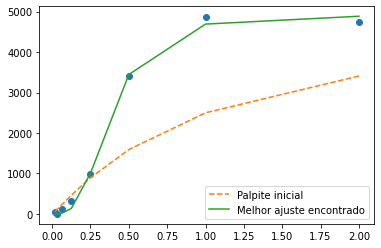

In [298]:
plt.plot(df_ATP["[ATP] (mM)"], df_ATP["Média v"], 'o')
plt.plot(df_ATP["[ATP] (mM)"], resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(df_ATP["[ATP] (mM)"], resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.legend()
#plt.ylim(0, 1000)
#plt.yscale('log')
plt.show()

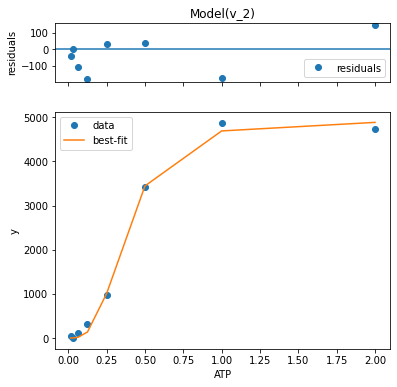

In [299]:
resultado_fit.plot()
plt.savefig('Modelo da reação enzimática.png', dpi=100, format='png', facecolor='white')
plt.show()

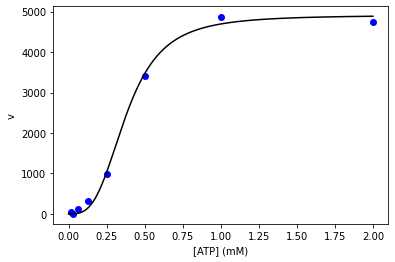

In [331]:
V_max = 4911.27
K = 0.046
h = 3.18

def v(ATP):
    return V_max*(ATP**h)/(K + (ATP**h))

ATP = np.linspace(0, 2, 500)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.plot(ATP, v(ATP), color='black')
df_ATP.plot('[ATP] (mM)',"Média v",legend=True, ax=ax1, kind = 'scatter', linewidth = 2.5, color = 'blue')
plt.xlabel('[ATP] (mM)')
plt.ylabel('v')
plt.savefig('ATP_lmfit.png', dpi=100, format='png', facecolor='white')
plt.show()